<a href="https://colab.research.google.com/github/mdhasanali3/tf_practice/blob/main/qwikilab_s_play(improve_data_quality).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd  # First, we'll import Pandas, a data processing and CSV file I/O library
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
if not os.path.isdir("../data/transport"):
  os.makedirs("../data/transport")

In [3]:

!gsutil cp gs://cloud-training/mlongcp/v3.0_MLonGC/toy_data/untidy_vehicle_data_toy.csv ../data/transport

Copying gs://cloud-training/mlongcp/v3.0_MLonGC/toy_data/untidy_vehicle_data_toy.csv...
/ [1 files][ 23.7 KiB/ 23.7 KiB]                                                
Operation completed over 1 objects/23.7 KiB.                                     


In [4]:
!ls -l ../data/transport

total 24
-rw-r--r-- 1 root root 24263 Jun  8 09:40 untidy_vehicle_data_toy.csv


# Read Dataset into a Pandas DataFrame

In [5]:
df_transport = pd.read_csv('../data/transport/untidy_vehicle_data_toy.csv')
df_transport.head() # Output the first five rows.

,Date,Zip Code,Model Year,Fuel,Make,Light_Duty,Vehicles
0,10/1/2018,90000.0,2006,Gasoline,OTHER/UNK,NaN,1.0
1,10/1/2018,NaN,2014,Gasoline,NaN,Yes,1.0
2,NaN,90000.0,NaN,Gasoline,OTHER/UNK,Yes,NaN
3,10/1/2018,90000.0,2017,Gasoline,OTHER/UNK,Yes,1.0
4,10/1/2018,90000.0,<2006,Diesel and Diesel Hybrid,OTHER/UNK,No,55.0


## DataFrame Column Data Types

In [6]:
df_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        497 non-null    object 
 1   Zip Code    497 non-null    float64
 2   Model Year  497 non-null    object 
 3   Fuel        497 non-null    object 
 4   Make        496 non-null    object 
 5   Light_Duty  496 non-null    object 
 6   Vehicles    496 non-null    float64
dtypes: float64(2), object(5)
memory usage: 27.4+ KB


In [7]:
print(df_transport)

          Date  Zip Code Model Year                      Fuel       Make  \
0    10/1/2018   90000.0       2006                  Gasoline  OTHER/UNK   
1    10/1/2018       NaN       2014                  Gasoline        NaN   
2          NaN   90000.0        NaN                  Gasoline  OTHER/UNK   
3    10/1/2018   90000.0       2017                  Gasoline  OTHER/UNK   
4    10/1/2018   90000.0      <2006  Diesel and Diesel Hybrid  OTHER/UNK   
..         ...       ...        ...                       ...        ...   
494  12/3/2018   90002.0       2010                  Gasoline     Type_I   
495  12/4/2018   90002.0       2010                  Gasoline     Type_B   
496  12/5/2018   90002.0       2010                  Gasoline     Type_C   
497  12/6/2018   90002.0       2010                  Gasoline     Type_J   
498  12/7/2018   90002.0       2010                  Gasoline     Type_J   

    Light_Duty  Vehicles  
0          NaN       1.0  
1          Yes       1.0  
2     

# Summary Statistics

In [8]:
df_transport.describe()

,Zip Code,Vehicles
count,497.00000,496.000000
mean,89838.23340,74.512097
std,3633.35609,243.839871
min,9001.00000,1.000000
25%,90001.00000,14.000000
50%,90001.00000,25.000000
75%,90001.00000,56.250000
max,90002.00000,3178.000000


In [10]:
df_transport.groupby('Fuel').first()

,Date,Zip Code,Model Year,Make,Light_Duty,Vehicles
Fuel,,,,,,
Battery Electric,10/1/2018,90000.0,<2006,OTHER/UNK,No,4.0
Diesel and Diesel Hybrid,10/1/2018,90000.0,<2006,OTHER/UNK,No,55.0
Flex-Fuel,10/14/2018,90001.0,2007,Type_A,Yes,78.0
Gasoline,10/1/2018,90000.0,2006,OTHER/UNK,Yes,1.0
Hybrid Gasoline,10/24/2018,90001.0,2009,OTHER/UNK,Yes,18.0
Natural Gas,10/25/2018,90001.0,2009,OTHER/UNK,No,2.0
Other,10/8/2018,90000.0,<2006,OTHER/UNK,Yes,6.0
Plug-in Hybrid,11/2/2018,90001.0,2012,OTHER/UNK,Yes,1.0


# Checking for Missing Values

In [12]:
df_transport.isnull().sum()

Date          2
Zip Code      2
Model Year    2
Fuel          2
Make          3
Light_Duty    3
Vehicles      3
dtype: int64

In [16]:
print(df_transport['Date'])
print(df_transport['Date'].isnull())


0      10/1/2018
1      10/1/2018
2            NaN
3      10/1/2018
4      10/1/2018
         ...    
494    12/3/2018
495    12/4/2018
496    12/5/2018
497    12/6/2018
498    12/7/2018
Name: Date, Length: 499, dtype: object
0      False
1      False
2       True
3      False
4      False
       ...  
494    False
495    False
496    False
497    False
498    False
Name: Date, Length: 499, dtype: bool


In [17]:
print (df_transport['Model Year'])
print (df_transport['Model Year'].isnull())

0       2006
1       2014
2        NaN
3       2017
4      <2006
       ...  
494     2010
495     2010
496     2010
497     2010
498     2010
Name: Model Year, Length: 499, dtype: object
0      False
1      False
2       True
3      False
4      False
       ...  
494    False
495    False
496    False
497    False
498    False
Name: Model Year, Length: 499, dtype: bool


# What can we deduce about the data at this point?


In [19]:
print ("Rows     : " ,df_transport.shape[0])
print ("Columns  : " ,df_transport.shape[1])
print ("\nFeatures : \n" ,df_transport.columns.tolist())
print ("\nUnique values :  \n",df_transport.nunique())
print ("\nMissing values :  ", df_transport.isnull().sum().values.sum())

Rows     :  499
Columns  :  7

Features : 
 ['Date', 'Zip Code', 'Model Year', 'Fuel', 'Make', 'Light_Duty', 'Vehicles']

Unique values :  
 Date          130
Zip Code        4
Model Year     15
Fuel            8
Make           43
Light_Duty      2
Vehicles      151
dtype: int64

Missing values :   17


In [21]:
df_transport.tail()

,Date,Zip Code,Model Year,Fuel,Make,Light_Duty,Vehicles
494,12/3/2018,90002.0,2010,Gasoline,Type_I,Yes,11.0
495,12/4/2018,90002.0,2010,Gasoline,Type_B,Yes,58.0
496,12/5/2018,90002.0,2010,Gasoline,Type_C,Yes,45.0
497,12/6/2018,90002.0,2010,Gasoline,Type_J,Yes,82.0
498,12/7/2018,90002.0,2010,Gasoline,Type_J,Yes,12.0


# What Are Our Data Quality Issues?
Data Quality Issue #1:
Missing Values: Each feature column has multiple missing values. In fact, we have a total of 18 missing values.

Data Quality Issue #2:
Date DataType: Date is shown as an "object" datatype and should be a datetime. In addition, Date is in one column. Our business requirement is to see the Date parsed out to year, month, and day.

Data Quality Issue #3:
Model Year: We are only interested in years greater than 2006, not "<2006".

Data Quality Issue #4:
Categorical Columns: The feature column "Light_Duty" is categorical and has a "Yes/No" choice. We cannot feed values like this into a machine learning model. In addition, we need to "one-hot encode the remaining "string"/"object" columns.

Data Quality Issue #5:
Temporal Features: How do we handle year, month, and day?

# Lab Task #1a: Check for missing values by showing how many rows contain NaN values for each feature column.

In [22]:
df_transport.isnull().sum()

Date          2
Zip Code      2
Model Year    2
Fuel          2
Make          3
Light_Duty    3
Vehicles      3
dtype: int64

# Lab Task #1b: Apply the lambda function.

In [26]:
df_tran_nonmiss=df_transport.apply(lambda x:x.fillna(x.value_counts().index[0]))

# Lab Task #1c: Check again for missing values.

In [28]:
df_tran_nonmiss.isnull().sum()

Date          0
Zip Code      0
Model Year    0
Fuel          0
Make          0
Light_Duty    0
Vehicles      0
dtype: int64

# Data Quality Issue #2:
Convert the Date Feature Column to a Datetime Format

In [30]:
df_transport['Date']= pd.to_datetime(df_tran_nonmiss['Date'],format='%m/%d/%Y')

In [33]:
df_transport=df_transport.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [34]:
df_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        499 non-null    datetime64[ns]
 1   Zip Code    499 non-null    float64       
 2   Model Year  499 non-null    object        
 3   Fuel        499 non-null    object        
 4   Make        499 non-null    object        
 5   Light_Duty  499 non-null    object        
 6   Vehicles    499 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 27.4+ KB


In [35]:
df_tran=df_transport

In [36]:
df_tran['year']=df_tran['Date'].dt.year
df_tran['month']= df_tran['Date'].dt.month
df_tran['day']= df_tran['Date'].dt.day


In [37]:
# The .groupby() function is used for spliting the data into groups based on some criteria.
grouped_data = df_transport.groupby(['Zip Code','Model Year','Fuel','Make','Light_Duty','Vehicles'])

 # Get the first entry for each month.
df_transport.groupby('month').first()

,Date,Zip Code,Model Year,Fuel,Make,Light_Duty,Vehicles,year,day
month,,,,,,,,,
1,2019-01-01,90001.0,2016,Gasoline,Type_G,Yes,18.0,2019,1
2,2019-02-01,90001.0,2017,Gasoline,Type_D,Yes,13.0,2019,1
3,2019-03-01,90001.0,2018,Gasoline,Type_C,Yes,32.0,2019,1
10,2018-10-01,90000.0,2006,Gasoline,OTHER/UNK,Yes,1.0,2018,1
11,2018-11-01,90001.0,2007,Gasoline,Type_M,Yes,15.0,2018,1
12,2018-12-02,90001.0,2015,Gasoline,Type_G,Yes,19.0,2018,2


Text(0.5, 1.0, 'vehicles  by month')

<Figure size 720x432 with 0 Axes>

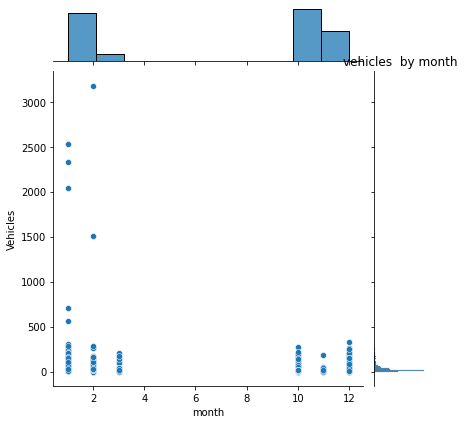

In [40]:
plt.figure(figsize=(10,6))
sns.jointplot(x='month',y='Vehicles',data=df_tran)
plt.title('vehicles  by month')

In [41]:
df_tran.columns.tolist()

['Date',
 'Zip Code',
 'Model Year',
 'Fuel',
 'Make',
 'Light_Duty',
 'Vehicles',
 'year',
 'month',
 'day']

# Data Quality Issue #3:
Rename a Feature Column and Remove a Value.


In [51]:
df_tran.rename(columns={'Date': 'date', 'Zip Code':'zipcode', 'Model Year': 'modelyear', 'Fuel': 'fuel', 'Make': 'make', 'Light_Duty': 'lightduty', 'Vehicles': 'vehicles'}, inplace = True) 
df_tran.head()

,date,zipcode,modelyear,fuel,make,lightduty,vehicles,year,month,day
0,2018-10-01,90000.0,2006,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1
1,2018-10-01,90001.0,2014,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1
2,2018-10-01,90000.0,<2006,Gasoline,OTHER/UNK,Yes,13.0,2018,10,1
3,2018-10-01,90000.0,2017,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1
4,2018-10-01,90000.0,<2006,Diesel and Diesel Hybrid,OTHER/UNK,No,55.0,2018,10,1


# Lab Task #3b: 
Create a copy of the dataframe to avoid copy warning issues.

In [59]:
df=df_tran.loc[df_tran.modelyear != '<2006'].copy()

In [47]:
df['modelyear'].value_counts(0)

2007    53
2008    45
2006    36
2010    34
2014    31
2015    30
2017    29
2016    29
2013    27
2009    25
2012    25
2011    24
2018    23
2019     5
Name: modelyear, dtype: int64

# Data Quality Issue #4:
Handling Categorical Columns

In [60]:
df['lightduty'].value_counts(0)

Yes    374
No      42
Name: lightduty, dtype: int64

In [61]:
df.loc[:,'lightduty']= df['lightduty'].apply(lambda x: 0 if x=="No" else 1)
df["lightduty"].value_counts(0)

1    374
0     42
Name: lightduty, dtype: int64

In [62]:
df.head()

,date,zipcode,modelyear,fuel,make,lightduty,vehicles,year,month,day
0,2018-10-01,90000.0,2006,Gasoline,OTHER/UNK,1,1.0,2018,10,1
1,2018-10-01,90001.0,2014,Gasoline,OTHER/UNK,1,1.0,2018,10,1
3,2018-10-01,90000.0,2017,Gasoline,OTHER/UNK,1,1.0,2018,10,1
16,2018-10-09,90001.0,2006,Diesel and Diesel Hybrid,Type_C,0,16.0,2018,10,9
17,2018-10-10,90001.0,2006,Diesel and Diesel Hybrid,OTHER/UNK,0,23.0,2018,10,10


# One-Hot Encoding Categorical Feature Columns

In [63]:
dummy_data=pd.get_dummies(df[['zipcode','modelyear','fuel','make']], drop_first=True)
dummy_data.head()

,zipcode,modelyear_2007,modelyear_2008,modelyear_2009,modelyear_2010,modelyear_2011,modelyear_2012,modelyear_2013,modelyear_2014,modelyear_2015,...,make_Type_P,make_Type_Q,make_Type_R,make_Type_S,make_Type_T,make_Type_U,make_Type_V,make_Type_W,make_Type_X,make_Type_Y
0,90000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,90001.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,90000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,90001.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,90001.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df=pd.concat([df,dummy_data], axis=1)
df.head()

,date,zipcode,modelyear,fuel,make,lightduty,vehicles,year,month,day,...,make_Type_P,make_Type_Q,make_Type_R,make_Type_S,make_Type_T,make_Type_U,make_Type_V,make_Type_W,make_Type_X,make_Type_Y
0,2018-10-01,90000.0,2006,Gasoline,OTHER/UNK,1,1.0,2018,10,1,...,0,0,0,0,0,0,0,0,0,0
1,2018-10-01,90001.0,2014,Gasoline,OTHER/UNK,1,1.0,2018,10,1,...,0,0,0,0,0,0,0,0,0,0
3,2018-10-01,90000.0,2017,Gasoline,OTHER/UNK,1,1.0,2018,10,1,...,0,0,0,0,0,0,0,0,0,0
16,2018-10-09,90001.0,2006,Diesel and Diesel Hybrid,Type_C,0,16.0,2018,10,9,...,0,0,0,0,0,0,0,0,0,0
17,2018-10-10,90001.0,2006,Diesel and Diesel Hybrid,OTHER/UNK,0,23.0,2018,10,10,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df.drop(['date','zipcode','modelyear','fuel','make'],axis=1)

,lightduty,vehicles,year,month,day,modelyear_2007,modelyear_2008,modelyear_2009,modelyear_2010,modelyear_2011,...,make_Type_P,make_Type_Q,make_Type_R,make_Type_S,make_Type_T,make_Type_U,make_Type_V,make_Type_W,make_Type_X,make_Type_Y
0,1,1.0,2018,10,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1.0,2018,10,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1.0,2018,10,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,16.0,2018,10,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,23.0,2018,10,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,1,11.0,2018,12,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
495,1,58.0,2018,12,4,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
496,1,45.0,2018,12,5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
497,1,82.0,2018,12,6,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Data Quality Issue #5:
Temporal Feature Columns

In [66]:
# Let's print the unique values for "month", "day" and "year" in our dataset. 
print ('Unique values of month:',df.month.unique())
print ('Unique values of day:',df.day.unique())
print ('Unique values of year:',df.year.unique())

Unique values of month: [10 11 12  1  2  3]
Unique values of day: [ 1  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
  2  3  4  5  6  7  8]
Unique values of year: [2018 2019]


In [67]:
# Here we map each temporal variable onto a circle such that the lowest value for that variable appears right next to the largest value. We compute the x- and y- component of that point using the sin and cos trigonometric functions.
df['day_sin'] = np.sin(df.day*(2.*np.pi/31))
df['day_cos'] = np.cos(df.day*(2.*np.pi/31))
df['month_sin'] = np.sin((df.month-1)*(2.*np.pi/12))
df['month_cos'] = np.cos((df.month-1)*(2.*np.pi/12))

# Let's drop month, and day
# TODO 5
df = df.drop(['month','day','year'], axis=1)

In [68]:
df.tail()

,date,zipcode,modelyear,fuel,make,lightduty,vehicles,zipcode,modelyear_2007,modelyear_2008,...,make_Type_T,make_Type_U,make_Type_V,make_Type_W,make_Type_X,make_Type_Y,day_sin,day_cos,month_sin,month_cos
494,2018-12-03,90002.0,2010,Gasoline,Type_I,1,11.0,90002.0,0,0,...,0,0,0,0,0,0,0.571268,0.820763,-0.5,0.866025
495,2018-12-04,90002.0,2010,Gasoline,Type_B,1,58.0,90002.0,0,0,...,0,0,0,0,0,0,0.724793,0.688967,-0.5,0.866025
496,2018-12-05,90002.0,2010,Gasoline,Type_C,1,45.0,90002.0,0,0,...,0,0,0,0,0,0,0.848644,0.528964,-0.5,0.866025
497,2018-12-06,90002.0,2010,Gasoline,Type_J,1,82.0,90002.0,0,0,...,0,0,0,0,0,0,0.937752,0.347305,-0.5,0.866025
498,2018-12-07,90002.0,2010,Gasoline,Type_J,1,12.0,90002.0,0,0,...,0,0,0,0,0,0,0.988468,0.151428,-0.5,0.866025


# Conclusion


This notebook introduced a few concepts to improve data quality. We resolved missing values, converted the Date feature column to a datetime format, renamed feature columns, removed a value from a feature column, created one-hot encoding features, and converted temporal features to meaningful representations. By the end of our lab, we gained an understanding as to why data should be "cleaned" and "pre-processed" before input into a machine learning model.